# Тестирование модулей

In [ ]:
cd ..

In [ ]:
SEED = 1

## Модуль `datasets`

In [ ]:
import dataset

Загрузка DataFrame

In [ ]:
df_video_games = dataset.load_video_games()
df_video_games

Загрузка кастомных датасетов

In [ ]:
dataset_video_games = dataset.StandartDataset('load_video_games')
print(dataset_video_games)
print()

for i in range(5):
    print(dataset_video_games[i])

In [ ]:
dataset_video_games = dataset.SentenceTransformerDataset('load_video_games')
print(dataset_video_games)
print()

for i in range(5):
    print(dataset_video_games[i])

## Модуль `preprocessing`

In [ ]:
import preprocessing

In [ ]:
cleaner_base = preprocessing.BaseCleaner(remove_number=False)

In [ ]:
%%time
clear_text = cleaner_base.transform(df_video_games.target.values)
clear_text[-5:]

## Модуль `models`

In [ ]:
import models

#### TFIDF:

In [ ]:
model_tfidf_wrapper = models.TfidfWrapperModel()

In [ ]:
%%time
embedding_database_tfidf = model_tfidf_wrapper.fit_transform(clear_text)

print(embedding_database_tfidf.shape)
embedding_database_tfidf

In [ ]:
# model_tfidf_wrapper.save('testing')

In [ ]:
# model_tfidf_wrapper.load('testing')

#### FastText

In [ ]:
model_fasttext_wrapper = models.FastTextWrapperModel(
    min_count=3,
    vector_size=100, 
    window=3, 
    sg=1
)

In [ ]:
%%time
embedding_database_fasttext = model_fasttext_wrapper.fit_transform(clear_text)

print(embedding_database_fasttext.shape)
embedding_database_fasttext

#### SentenceTransformers

In [ ]:
# model_transformer_wrapper = models.SentenceTransformerWrapperModel()

In [ ]:
# model_transformer_wrapper.fit(clear_text)

In [ ]:
# embedding_database_transformer = model_transformer_wrapper.transform(clear_text)

# print(embedding_database_transformer.shape)
# embedding_database_transformer

## Модуль `similarity_search`

In [ ]:
import similarity_search

### ForCycleSearch

Для TfIdf:

In [ ]:
%%time
search_cycle_tfidf = similarity_search.ForCycleSearch(model_tfidf_wrapper, embedding_database_tfidf, df_video_games.target.values)
search_cycle_tfidf.search('mario 9', 5)

Для FastText:

In [ ]:
%%time
search_cycle_fasttext = similarity_search.ForCycleSearch(model_fasttext_wrapper, embedding_database_fasttext, df_video_games.target.values)
search_cycle_fasttext.search('mario 9', 5)

Для SentenceTransformer:

In [ ]:
# %%time
# search_cycle_transformer = similarity_search.ForCycleSearch(model_transformer_wrapper, embedding_database_transformer, df_video_games.target.values)
# search_cycle_transformer.search('mario 9', 5)

### TheFuzzSearch

In [ ]:
%%time
search_fuzz = similarity_search.TheFuzzSearch(df_video_games.target.values)
search_fuzz.search('mario 9', 5)

### FaissSearch

Для Fasttext

In [ ]:
%%time
search_faiss_fasttext = similarity_search.FaissSearch(model_fasttext_wrapper, embedding_database_fasttext, df_video_games.target.values)
search_faiss_fasttext.search('mario 9', 5)

Для TF-IDF

In [ ]:
%%time
search_faiss_tfidf = similarity_search.FaissSearch(model_tfidf_wrapper, embedding_database_tfidf, df_video_games.target.values)
search_faiss_tfidf.search('mario 9', 5)

## Модуль `augmentation`

In [ ]:
import augmentation

Создание ошибок в словах

In [ ]:
%%time
misspelling_augmentation = augmentation.MisspellingAugmentation(
    add_syms={'p': 0.05},
    change_syms={'p': 0.05},
    delete_syms={'p': 0.05},
    multiply_syms={'p': 0.05},
    swap_syms={'p': 0.05},
    seed=SEED,
)
misspelling_augmentation.transform(df_video_games.target.values)

In [ ]:
%%time
structure_augmentation = augmentation.StructureAugmentation(
    delete_words={'p': 0.05},
    get_abbreviation=False,
    shuffle_words=True,
    seed=SEED,
)
structure_augmentation.transform(df_video_games.target.values)

In [ ]:
%%time
structure_augmentation = augmentation.StructureAugmentation(
    delete_words=False,
    get_abbreviation=True,
    shuffle_words=False,
    seed=SEED,
)
structure_augmentation.transform(df_video_games.target.values)

Датасет с аугментацией

In [ ]:
dataset_video_games = dataset.SentenceTransformerDataset('load_video_games', [misspelling_augmentation])
print(dataset_video_games)
print()

for i in range(5):
    print(dataset_video_games[i])

## Реализация `Validate` моделей

In [ ]:
%%time
validate = models.Validate(
    search_cycle_tfidf,
    [
        augmentation.MisspellingAugmentation(
            add_syms={'p': 0.04},
            change_syms={'p': 0.04},
            delete_syms={'p': 0.04},
            multiply_syms={'p': 0.04},
            swap_syms={'p': 0.04},
            seed=SEED,
        )
    ]
)

TheFuzz

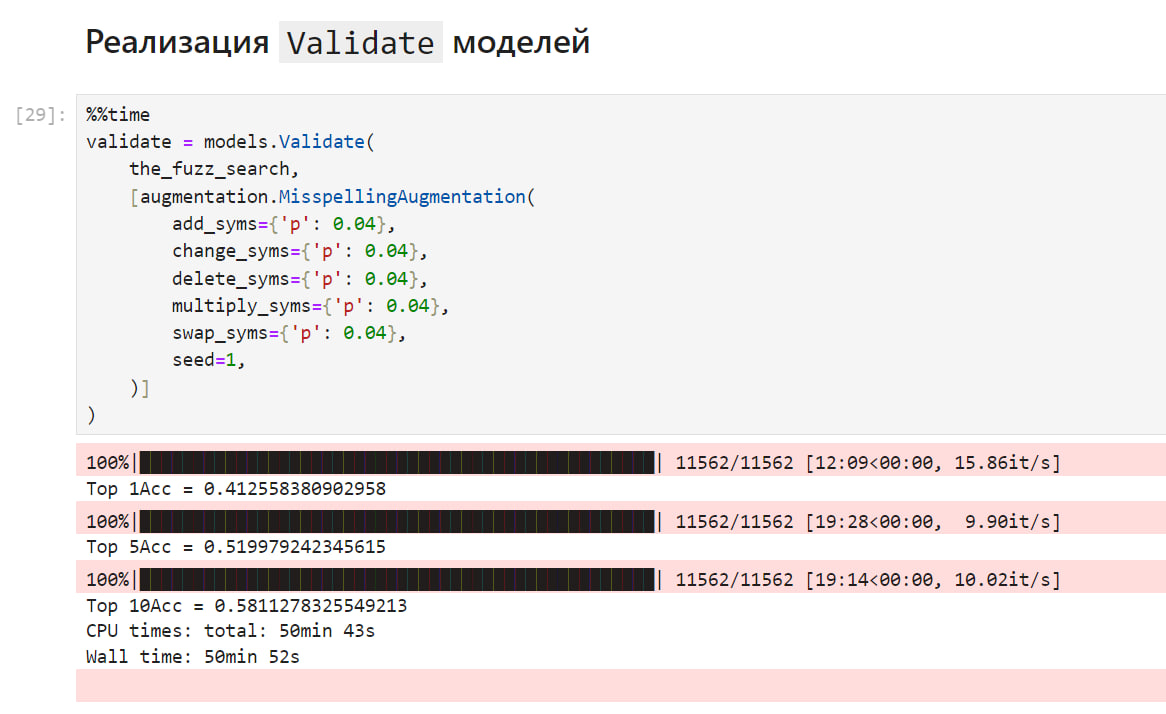

С Faiss Fasttext

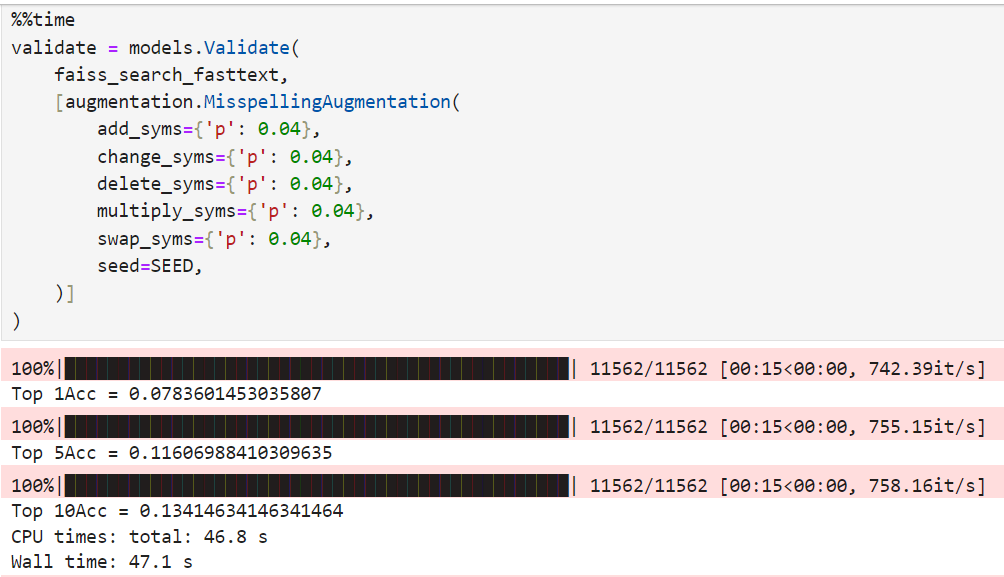

С Faiss TfIdf

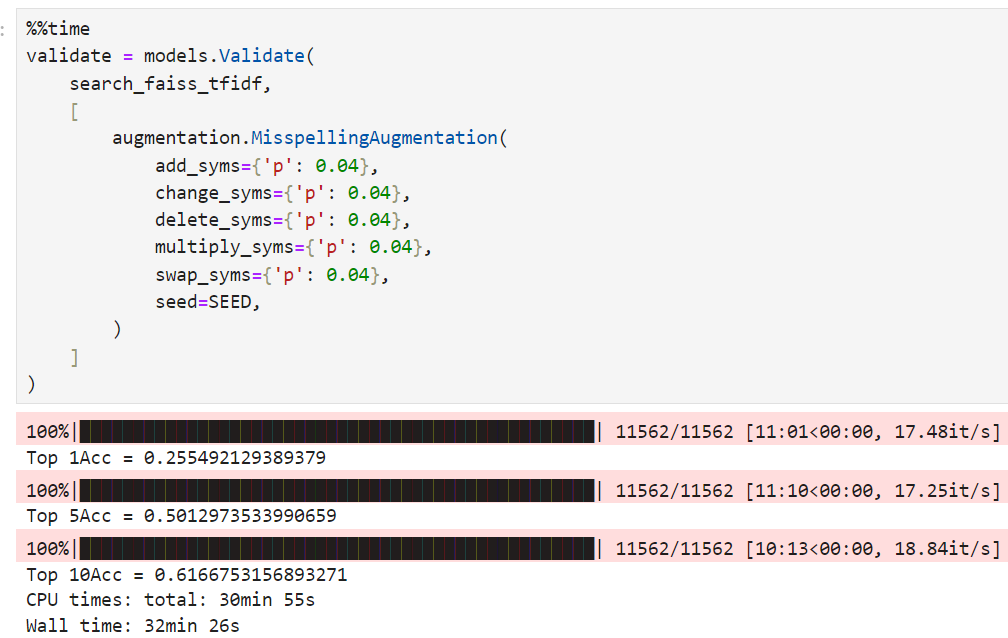

С TfIdf

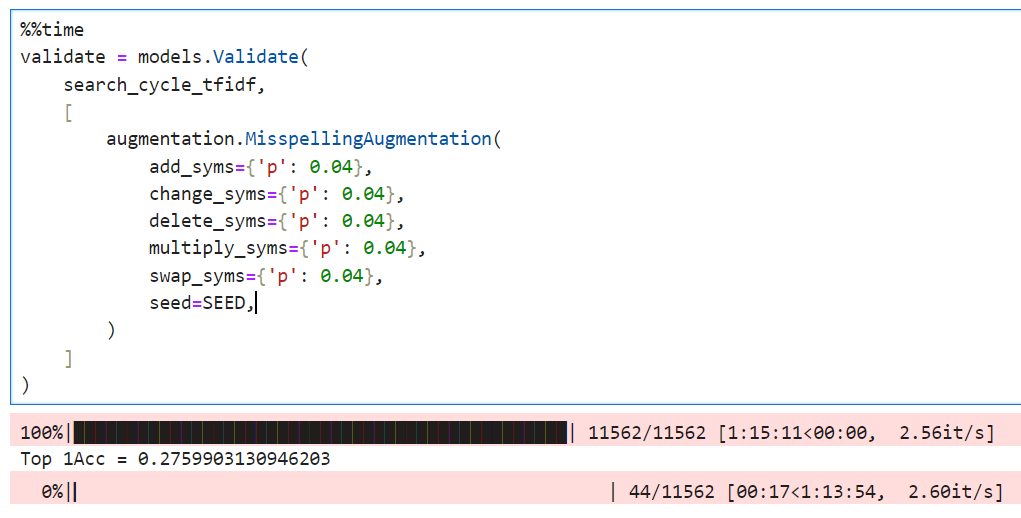

## `TEMP` code: